# Chicago Housing Profile
The following notebook shows how to use sociomepy to construct a "housing profile" over addresses in the city of chicago. These metrics capture current and historical property values as well as key neighborhood statistics.

First, let's get started by importing the right modules

In [31]:
from sociomepy.data import SociomeDataFrame

## Property Tax Assessments
First, we are going to use a dataset of residential property tax assessments found at https://datacatalog.cookcountyil.gov/Property-Taxation/Assessor-Archived-05-11-2022-Residential-Property-/bcnq-qi2z

This will serve as our address points over the city of chicago

In [32]:
from sociomepy.accessors import *

residences = SociomeDataFrame.from_csv('../data/housing/chicago-assessments.csv', access_by_attribute('Longitude','Latitude'))

/home/skr/Documents/sociome/sociomepy/sociomepy/data.py:110: DtypeWarning: Columns (3,4,5,21,23,24,25,28,29,30,31,33,36,37,38,39,40,41,43,44,45,46,47,48,49,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, **parser_args)


In [33]:
residences.data

Property Index Number Assessment Triad  Property Class  \
0         14-05-211-025-1061             City             299   
1         11-31-408-019-1001             City             299   
2         14-30-403-273-1053             City             299   
3         17-22-110-100-1333             City             299   
4         14-31-114-037-1002             City             299   
...                      ...              ...             ...   
678651    17-10-206-035-1039             City             299   
678652    17-17-226-017-1030             City             299   
678653    17-22-314-033-1075             City             299   
678654    17-08-438-006-1342             City             299   
678655    17-22-107-070-1140             City             299   

       Property Address Property Apartment Num. Property City  Township Name  \
0                   NaN                     NaN           NaN      Lake View   
1                   NaN                     NaN           NaN    Rogers Park   
2                   NaN                     NaN           NaN      Lake View   
3                   NaN                     NaN           NaN  South Chicago   
4                   NaN                     NaN           NaN   West Chicago   
...                 ...                     ...           ...            ...   
678651              NaN                     NaN           NaN  North Chicago   
678652              NaN                     NaN           NaN   West Chicago   
678653              NaN                     NaN           NaN  South Chicago   
678654              NaN                     NaN           NaN   West Chicago   
678655              NaN                     NaN           NaN  South Chicago   

        Township Code  Neighborhood Code  Township Neighborhood Only  ...  \
0                  73              73031                          31  ...   
1                  75              75031                          31  ...   
2                  73              73200                         200  ...   
3                  76              76012                          12  ...   
4                  77              77170                         170  ...   
...               ...                ...                         ...  ...   
678651             74              74030                          30  ...   
678652             77              77131                         131  ...   
678653             76              76011                          11  ...   
678654             77              77131                         131  ...   
678655             76              76011                          11  ...   

       Modeled Sale Week of Year  Modeled Sale Quarter of Year  \
0                              1                            Q1   
1                              1                            Q1   
2                              1                            Q1   
3                              1                            Q1   
4                              1                            Q1   
...                          ...                           ...   
678651                         1                            Q1   
678652                         1                            Q1   
678653                         1                            Q1   
678654                         1                            Q1   
678655                         1                            Q1   

       Modeled Sale Quarter  Modeled Sale Month  Modeled Sale Week  \
0                        96                 288               1252   
1                        96                 288               1252   
2                        96                 288               1252   
3                        96                 288               1252   
4                        96                 288               1252   
...                     ...                 ...                ...   
678651                   96                 288          

We can plot these addresses with the following code

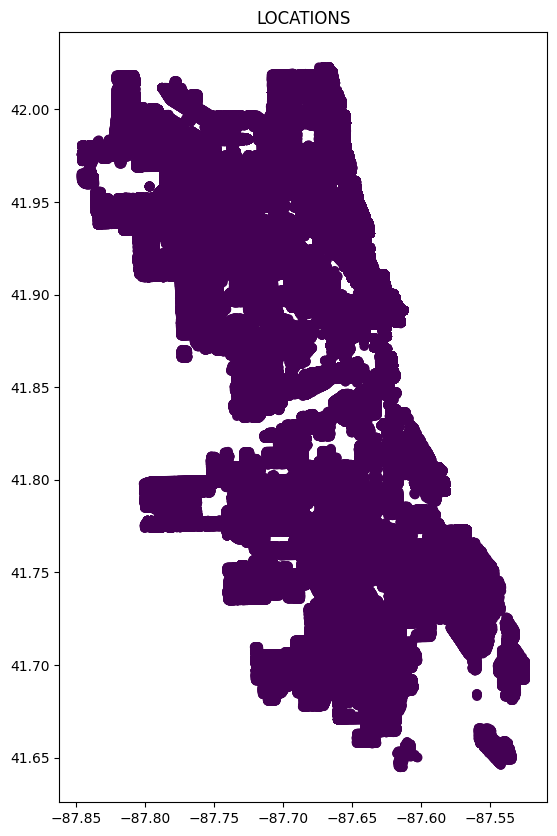

In [34]:
%matplotlib inline
residences.to_mpl_inline(['LOCATIONS'])

## Augmenting This Dataset

### Zillow Data
To this dataset, we will add other housing based signals. For example, we can include neighborhood-level pricing statistics from zillow.

In [39]:
from sociomepy.metrics import SpatialSubdivisionFunction
zillow = SociomeDataFrame.from_save_file('../data/housing/zillow')
residences.add_subdivision(zillow, 'neighborhood', 'RegionID')

for i in range(2001,2023):
    date = str(i) + '-06-30'
    prices_in_july = SpatialSubdivisionFunction(zillow, 'neighborhood', date, 'RegionID')
    residences.add_metric_to_data(prices_in_july, 'Median_Neighborhood_'+date)

/home/skr/Documents/sociome/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3378: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [40]:
residences.data.head()

Property Index Number Assessment Triad  Property Class Property Address  \
0    14-05-211-025-1061             City             299              NaN   
1    11-31-408-019-1001             City             299              NaN   
2    14-30-403-273-1053             City             299              NaN   
3    17-22-110-100-1333             City             299              NaN   
4    14-31-114-037-1002             City             299              NaN   

  Property Apartment Num. Property City  Township Name  Township Code  \
0                     NaN           NaN      Lake View             73   
1                     NaN           NaN    Rogers Park             75   
2                     NaN           NaN      Lake View             73   
3                     NaN           NaN  South Chicago             76   
4                     NaN           NaN   West Chicago             77   

   Neighborhood Code  Township Neighborhood Only  ...  \
0              73031                          31  ...   
1              75031                          31  ...   
2              73200                         200  ...   
3              76012                          12  ...   
4              77170                         170  ...   

  Median_Neighborhood_2012-06-30  Median_Neighborhood_2013-06-30  \
0                            NaN                             NaN   
1                       147094.0                        150738.0   
2                       464047.0                        494234.0   
3                       282880.0                        312181.0   
4                       461607.0                        498538.0   

  Median_Neighborhood_2014-06-30  Median_Neighborhood_2015-06-30  \
0                            NaN                             NaN   
1                       171633.0                        187102.0   
2                       535601.0                        555220.0   
3                       348409.0                        362603.0   
4                       535830.0                        557215.0   

   Median_Neighborhood_2016-06-30  Median_Neighborhood_2017-06-30  \
0                             NaN                             NaN   
1                        199317.0                        210760.0   
2                        570260.0                        573521.0   
3                        371948.0                        379758.0   
4                        582891.0                        599779.0   

   Median_Neighborhood_2018-06-30 Median_Neighborhood_2019-06-30  \
0                             NaN                            NaN   
1                        217255.0                       218850.0   
2                        576475.0                       569636.0   
3                        384354.0                       379250.0   
4                        604534.0                       600768.0   

   Median_Neighborhood_2020-06-30  Median_Neighborhood_2021-06-30  
0                             NaN                             NaN  
1                        220872.0                        238602.0  
2                        562850.0                        596671.0  
3                        380684.0                        398247.0  
4                        608281.0                        643755.0  

[5 rows x 104 columns]

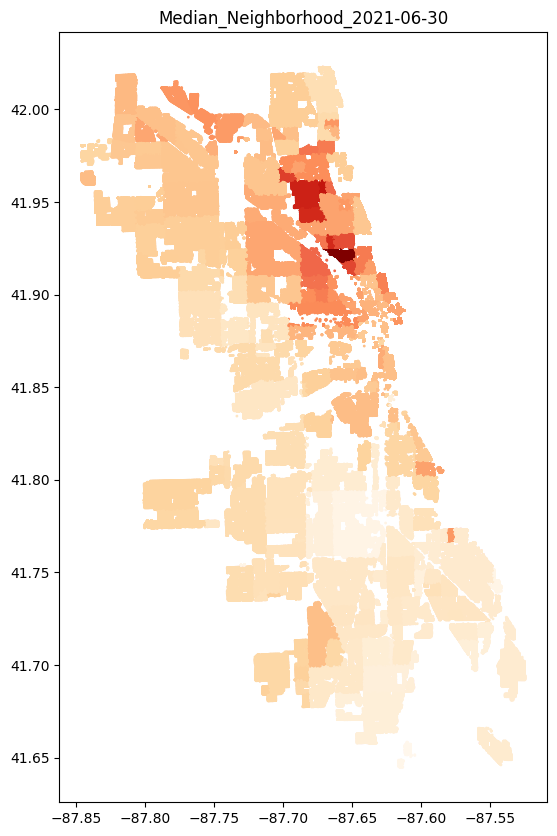

In [41]:
residences.to_mpl_inline(['Median_Neighborhood_2021-06-30'])

The final dataset has the following attributes now

In [60]:
for i in residences.data.columns:
    print(i)

Property Index Number
Assessment Triad
Property Class
Property Address
Property Apartment Num.
Property City
Township Name
Township Code
Neighborhood Code
Township Neighborhood Only
Modeling Group
Proportion Assessed
Key PIN
Multi Code Indicator
Multi Code
Number of Active 288s (HIEs)
Number of Ended 288s (HIEs)
Sale Date
Sale Price
Sale Document Number
Land Square Feet
Large Home Indicator
Age
Apartments
Wall Material
Roof Material
Rooms
Bedrooms
Basement
Basement Finish
Central Heating
Central Air Conditioning
Fireplaces
Attic Type
Full Baths
Half Baths
Design Plan
Cathedral Ceiling
Garage 1 Size
Garage 1 Material
Garage 1 Attached
Garage 1 Area
Building Square Feet
Repair Condition
Use
Type of Residence
Attic Finish
Renovation
Porch
Property Zip Code
Tract GEOID
Municipality FIPS Code
Municipality Name
O'Hare Noise Indicator
FEMA Floodplain
Flood Risk Factor
Flood Risk Direction
Road Proximity < 100 Feet
Road Proximity 101 - 300 Feet
Elementary/Middle School District
High School Dis

In [61]:
residences.to_file('../data/housing/chicago-housing-profile')

/home/skr/Documents/sociome/sociomepy/sociomepy/data.py:328: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  self.data.to_file(filename)


KeyboardInterrupt: 